In [47]:
from vyakkha_pytorch_py import *

In [35]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import load_model
import shap

In [37]:
#data1=pd.read_csv('/content/Month_Value_3.csv')
data1=pd.read_excel('/content/Duplicate_regression_data (1).xlsx')
data2=pd.read_excel('/content/Income (1).xlsx')

In [90]:
data2

,Unnamed: 0,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,0,28,Private,Bachelors,Single,White-Collar,White,Female,60,0
1,1,30,Self-Employed,Assoc,Married,Professional,White,Male,65,1
2,2,32,Private,Some-college,Married,White-Collar,White,Male,50,0
3,3,20,Private,Some-college,Single,Service,White,Female,35,0
4,4,41,Self-Employed,Some-college,Married,White-Collar,White,Male,50,0
...,...,...,...,...,...,...,...,...,...,...
26043,26043,28,Private,HS-grad,Married,White-Collar,White,Male,40,0
26044,26044,18,Private,School,Single,Blue-Collar,White,Male,55,0
26045,26045,22,Private,Some-college,Single,White-Collar,White,Female,40,0
26046,26046,42,Self-Employed,Bachelors,Divorced,White-Collar,Other,Male,30,0


Preprocessing model training for classification data

In [92]:
datac=data2.drop(["Unnamed: 0"],axis=1)

In [93]:
datac

,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,28,Private,Bachelors,Single,White-Collar,White,Female,60,0
1,30,Self-Employed,Assoc,Married,Professional,White,Male,65,1
2,32,Private,Some-college,Married,White-Collar,White,Male,50,0
3,20,Private,Some-college,Single,Service,White,Female,35,0
4,41,Self-Employed,Some-college,Married,White-Collar,White,Male,50,0
...,...,...,...,...,...,...,...,...,...
26043,28,Private,HS-grad,Married,White-Collar,White,Male,40,0
26044,18,Private,School,Single,Blue-Collar,White,Male,55,0
26045,22,Private,Some-college,Single,White-Collar,White,Female,40,0
26046,42,Self-Employed,Bachelors,Divorced,White-Collar,Other,Male,30,0


In [96]:
#categ = ['workclass','education','marital_status','occupation','race','gender']
datac=pd.get_dummies(datac)

In [97]:
datac

,age,hours_per_week,income,workclass_Government,workclass_Other/Unknown,workclass_Private,workclass_Self-Employed,education_Assoc,education_Bachelors,education_Doctorate,...,occupation_Blue-Collar,occupation_Other/Unknown,occupation_Professional,occupation_Sales,occupation_Service,occupation_White-Collar,race_Other,race_White,gender_Female,gender_Male
0,28,60,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
1,30,65,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,32,50,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,20,35,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,41,50,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,28,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
26044,18,55,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
26045,22,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
26046,42,30,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1


In [103]:
Xc=datac.drop(['income'],axis=1)
yc=datac['income']

In [105]:
from sklearn.model_selection import train_test_split
X_trainc, X_testc,y_trainc, y_testc = train_test_split(Xc,y , random_state=104,  test_size=0.25,  shuffle=False)
import xgboost as xgb
modelc=xgb.XGBClassifier()
modelc.fit(X_trainc,y_trainc)
from sklearn.metrics import r2_score
yp2c=model.predict(X_testc)
print(r2_score(y_testc,yp2c))
from sklearn.metrics import r2_score
yp3c=model.predict(X_trainc)
print(r2_score(y_trainc,yp3c))

0.11053511759403656
0.10546007168699023


Preprocessing model training for regression data


In [39]:
datar=data1.drop(["date","street"],axis=1)

In [41]:
datar["Year"]=data1['yr_built']

In [42]:
categ = ['city','statezip','country']
from sklearn import preprocessing
# Encode Categorical Columns
le = preprocessing.LabelEncoder()
datar[categ] = datar[categ].apply(le.fit_transform)

In [43]:
datar=datar.set_index("yr_built")

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
datar

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,city,statezip,country,Year
yr_built,,,,,,,,,,,,,,,,
1955,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,2005,36,62,0,1955
1921,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,0,35,58,0,1921
1966,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,0,18,26,0,1966
1963,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,0,3,7,0,1963
1976,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1992,31,31,0,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,2005,36,62,0,1955
1955,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,2005,36,62,0,1955
1955,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,2005,36,62,0,1955


In [83]:
y = datar["price"]

X= datar.drop(["price"],axis=1)

In [84]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,city,statezip,country,Year
yr_built,,,,,,,,,,,,,,,
1955,3,1.50,1340,7912,1.5,0,0,3,1340,0,2005,36,62,0,1955
1921,5,2.50,3650,9050,2.0,0,4,5,3370,280,0,35,58,0,1921
1966,3,2.00,1930,11947,1.0,0,0,4,1930,0,0,18,26,0,1966
1963,3,2.25,2000,8030,1.0,0,0,4,1000,1000,0,3,7,0,1963
1976,4,2.50,1940,10500,1.0,0,0,4,1140,800,1992,31,31,0,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,3,1.50,1340,7912,1.5,0,0,3,1340,0,2005,36,62,0,1955
1955,3,1.50,1340,7912,1.5,0,0,3,1340,0,2005,36,62,0,1955
1955,3,1.50,1340,7912,1.5,0,0,3,1340,0,2005,36,62,0,1955


In [50]:
y

yr_built
1955     313000.0
1921    2384000.0
1966     342000.0
1963     420000.0
1976     550000.0
          ...    
1955     313000.0
1955     313000.0
1955     313000.0
1955     313000.0
1955     313000.0
Name: price, Length: 4606, dtype: float64

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y , random_state=104,  test_size=0.25,  shuffle=False)
import xgboost as xgb
model=xgb.XGBRFRegressor()
model.fit(X_train,y_train)
from sklearn.metrics import r2_score
yp2=model.predict(X_test)
print(r2_score(y_test,yp2))
from sklearn.metrics import r2_score
yp3=model.predict(X_train)
print(r2_score(y_train,yp3))

In [87]:
from sklearn.metrics import r2_score
yp2=model.predict(X_test)
print(r2_score(y_test,yp2))

0.03637070602473658


In [88]:
from sklearn.metrics import r2_score
yp2=model.predict(X_train)
print(r2_score(y_train,yp2))

0.5801913549600215


In [115]:
datac.columns

Index(['age', 'hours_per_week', 'income', 'workclass_Government',
       'workclass_Other/Unknown', 'workclass_Private',
       'workclass_Self-Employed', 'education_Assoc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Prof-school', 'education_School', 'education_Some-college',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Separated', 'marital_status_Single',
       'marital_status_Widowed', 'occupation_Blue-Collar',
       'occupation_Other/Unknown', 'occupation_Professional',
       'occupation_Sales', 'occupation_Service', 'occupation_White-Collar',
       'race_Other', 'race_White', 'gender_Female', 'gender_Male'],
      dtype='object')

Plots for Classification Data

In [108]:
explainerc = shap.Explainer(modelc, masker=X_trainc,)
shap.initjs()
shap_valuesc = explainerc(X_testc)

 99%|===================| 6429/6512 [00:11<00:00]       

In [109]:
len(shap_valuesc.values)

6512

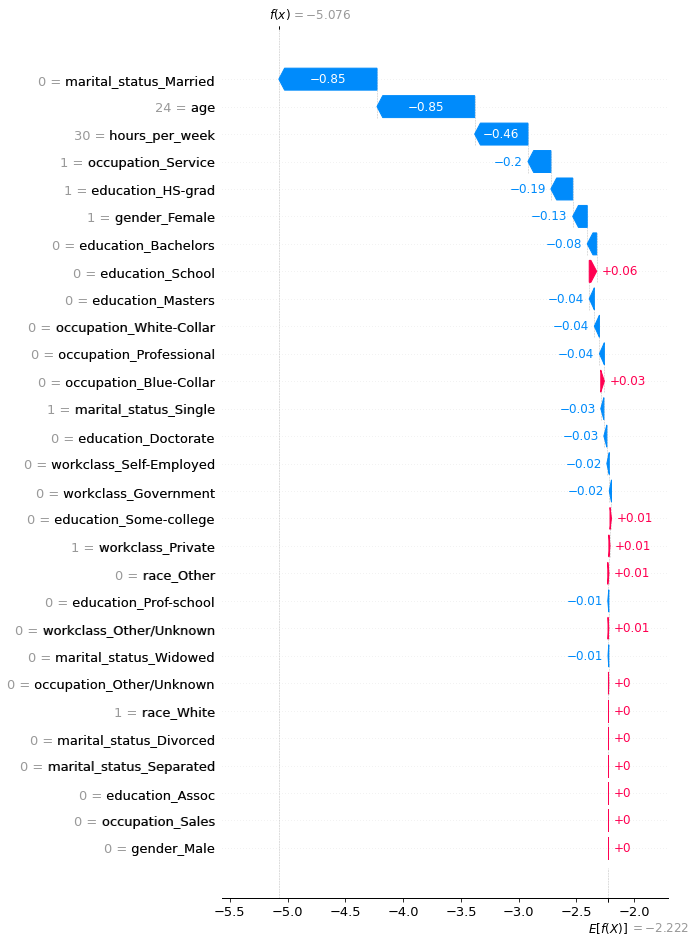

In [111]:
shap.plots.waterfall(shap_valuesc[0], max_display=30)

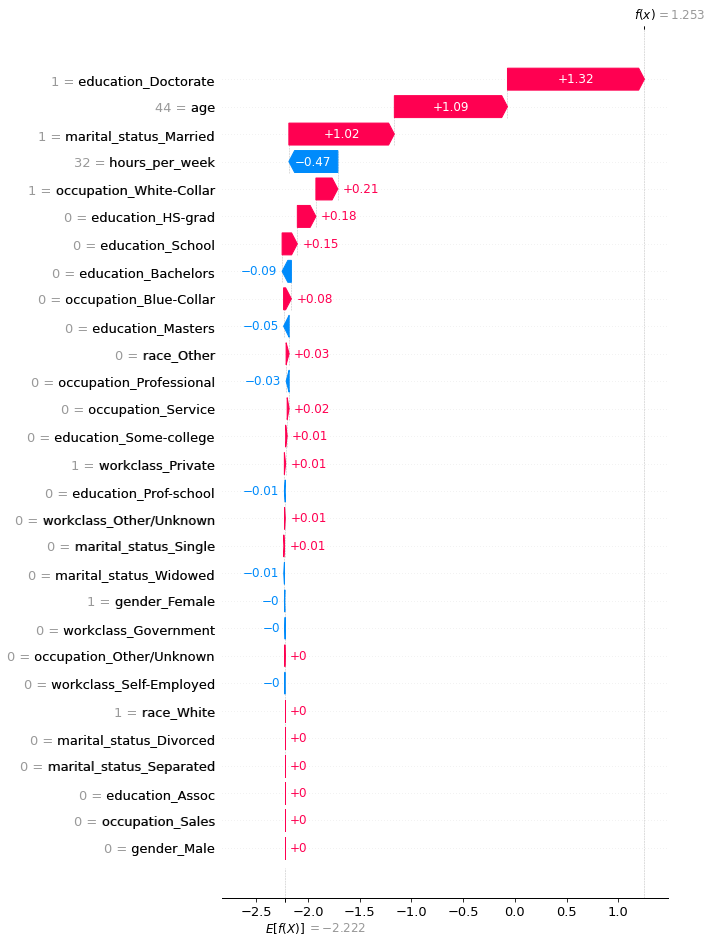

In [114]:
shap.plots.waterfall(shap_valuesc[2000], max_display=30)

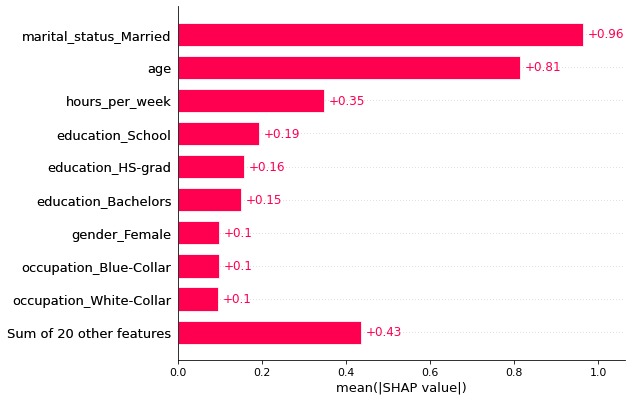

In [117]:
shap.plots.bar(shap_valuesc)

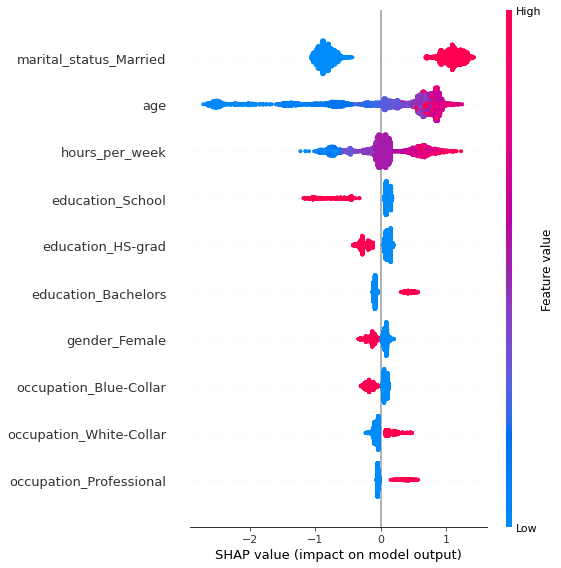

In [116]:
ssc = shap_summary(shap_values=shap_valuesc, dataset=X_testc)
ssc

Plots for Regression Data

Calling "shap.Explainer" and fit the model and X_train

In [64]:
explainer = shap.Explainer(model, masker=X_train,)
shap.initjs()
shap_values = explainer(X_test)

In [65]:
len(shap_values.values)

1152

In [66]:
explainer.shap_values(X_test)

array([[ 0.00000000e+00, -3.22071973e+02,  9.04879421e+04, ...,
        -7.80652197e+01,  0.00000000e+00,  5.26880458e+04],
       [ 0.00000000e+00, -4.84319375e+02,  3.72189115e+04, ...,
        -7.80652197e+01,  0.00000000e+00, -1.04197470e+04],
       [ 0.00000000e+00, -9.10098118e+02,  3.04143709e+05, ...,
        -6.22929277e+02,  0.00000000e+00, -2.79374616e+03],
       ...,
       [ 0.00000000e+00, -1.95545516e+03, -1.66380268e+05, ...,
        -7.80652197e+01,  0.00000000e+00, -8.66239761e+02],
       [ 0.00000000e+00, -1.95545516e+03, -1.66380268e+05, ...,
        -7.80652197e+01,  0.00000000e+00, -8.66239761e+02],
       [ 0.00000000e+00, -1.95545516e+03, -1.66380268e+05, ...,
        -7.80652197e+01,  0.00000000e+00, -8.66239761e+02]])

In [89]:
shap_values[0]

.values =
array([ 0.00000000e+00, -3.22071973e+02,  9.04879421e+04,  2.90229896e+02,
        0.00000000e+00,  0.00000000e+00, -4.13965633e+03,  0.00000000e+00,
        3.81824083e+03,  5.71350225e+02,  0.00000000e+00,  6.25831940e+03,
       -7.80652197e+01,  0.00000000e+00,  5.26880458e+04])

.base_values =
548318.2155834961

.data =
array([4.000e+00, 2.750e+00, 2.880e+03, 4.000e+03, 1.500e+00, 0.000e+00,
       0.000e+00, 3.000e+00, 2.100e+03, 7.800e+02, 2.000e+03, 3.500e+01,
       6.400e+01, 0.000e+00, 1.912e+03])

In [67]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'city', 'statezip', 'country', 'Year'],
      dtype='object')

In [68]:
X100 = shap.utils.sample(X, 100)

Waterfall Plot

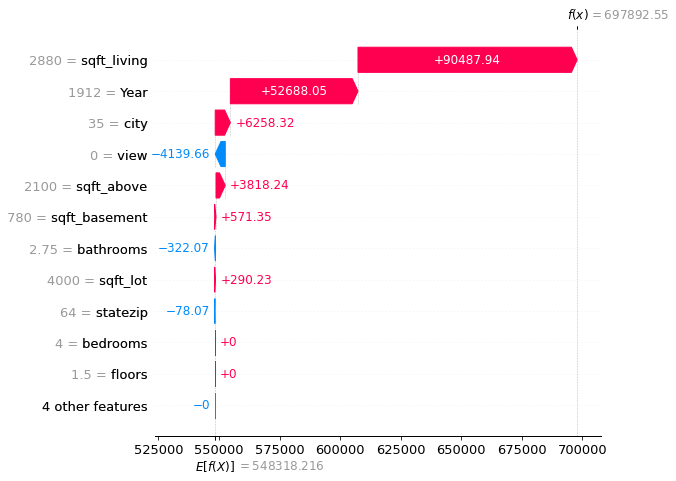

In [70]:
shap.plots.waterfall(shap_values[0], max_display=12)

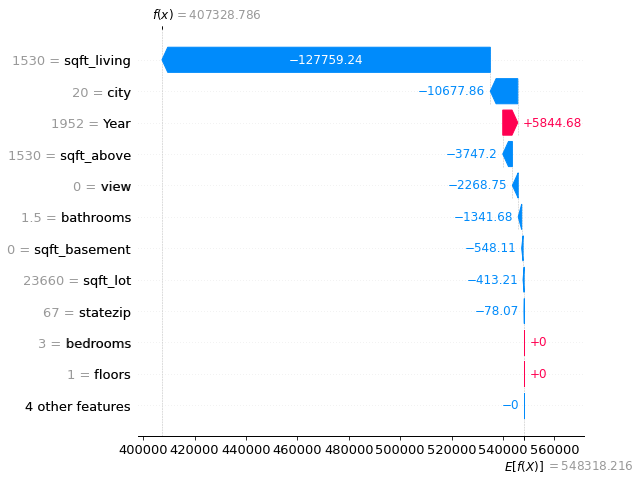

In [71]:
shap.plots.waterfall(shap_values[3], max_display=12)

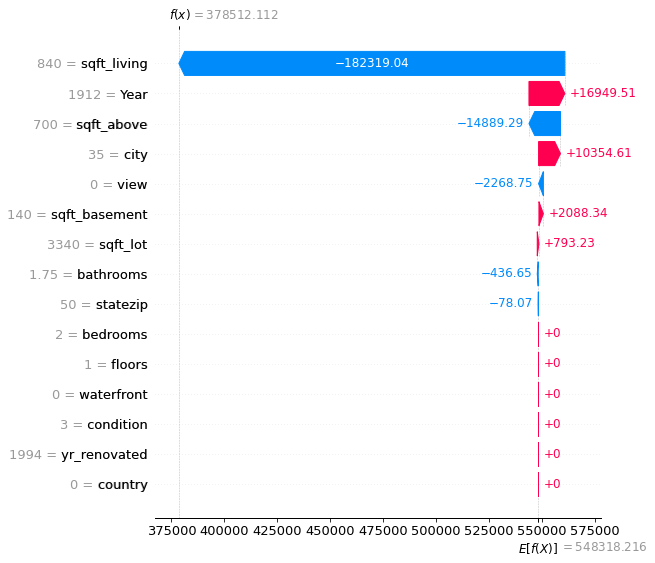

In [80]:
shap.plots.waterfall(shap_values[10], max_display=30)

Summary Plot

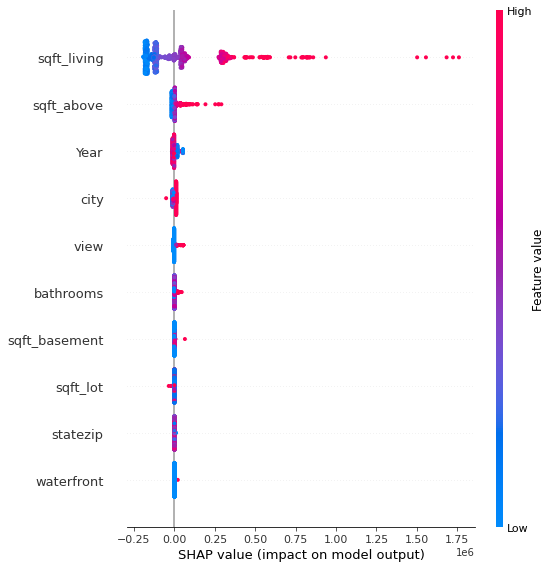

In [73]:
ss = shap_summary(shap_values=shap_values, dataset=X_test)
ss

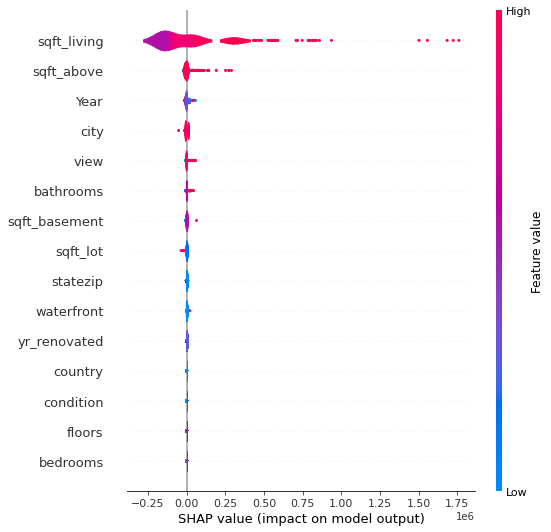

In [74]:
shap.summary_plot(
    shap_values=shap_values,
    # features=X_test,
    feature_names=X_test.columns,
    plot_type='violin',
    layered_violin_max_num_bins=12,
    class_inds=range(7),
    use_log_scale=False,
    color='green'
)

Bar Plots

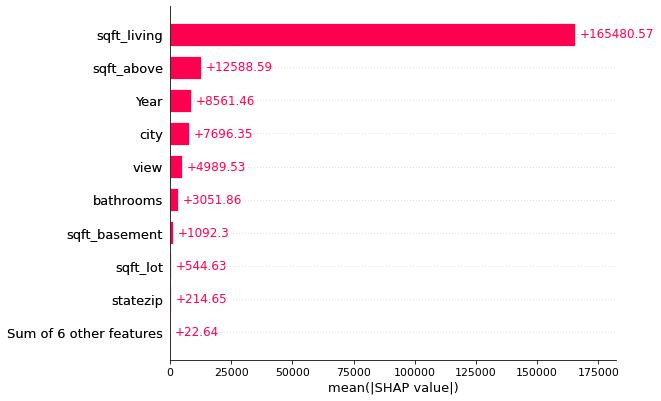

In [75]:
shap.plots.bar(shap_values)

Summary Plots

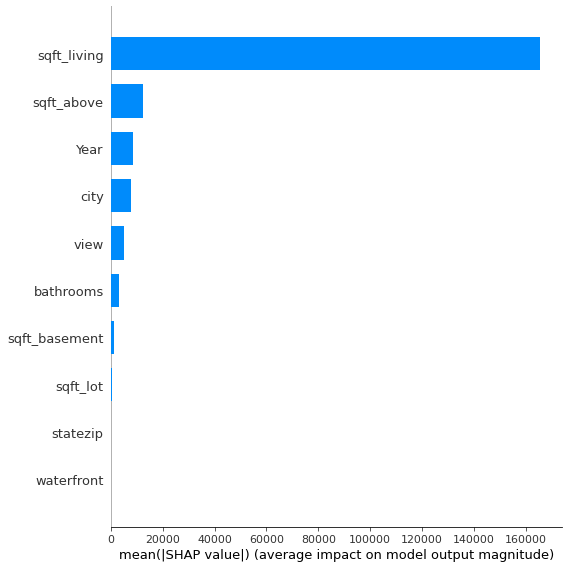

In [76]:
si = shap_summary(shap_values=shap_values, dataset=X_test, plot_type='bar')
si

In [77]:
X_test.shape

(1152, 15)

In [78]:
shap_values.shape

(1152, 15)